In [ ]:
!pip install pandas matplotlib seaborn plotly

In [ ]:
!pip install dash

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output


#### Loading and Exploring Data

In [ ]:
# Load dataset
data = pd.read_csv("dairy_dataset.csv")

Often, loading and reviewing a dataset is necessary to know that subsequent operations are performed based on the actual data organization. It is verified that new data types are of interest and that first glimpses of data quality problems are discovered.

In [ ]:
# Show basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [ ]:
# Summary statistics of numerical columns
print(data.describe())

       Total Land Area (acres)  Number of Cows   Product ID  \
count              4325.000000     4325.000000  4325.000000   
mean                503.483073       54.963699     5.509595   
std                 285.935061       26.111487     2.842979   
min                  10.170000       10.000000     1.000000   
25%                 252.950000       32.000000     3.000000   
50%                 509.170000       55.000000     6.000000   
75%                 751.250000       77.000000     8.000000   
max                 999.530000      100.000000    10.000000   

       Quantity (liters/kg)  Price per Unit   Total Value  Shelf Life (days)  \
count           4325.000000     4325.000000   4325.000000        4325.000000   
mean             500.652657       54.785938  27357.845411          29.127630   
std              288.975915       26.002815  21621.051594          30.272114   
min                1.170000       10.030000     42.516500           1.000000   
25%              254.170000     

In [ ]:
# Inspect the first few rows
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


Therefore, cleaning and preparing the data should be done so as to increase the validity of the analysis carried out. Imputation of missing values, changing data format and removing outliers is crucial for data cleanliness to be achieved.

### Data Wrangling

In [ ]:
# Handling missing values (basic example; more nuanced methods may be necessary)
data = data.dropna()

It is recommended to drop missing values so as to reduce the likelihood of making wrong or biased conclusion during the analysis. It may be beneficial for future analyses to investigate further imputation methods to keep more data for their study.

In [ ]:
# Convert date columns to datetime
# Changing the format to '%Y-%m-%d' to match the actual format.
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Production Date'] = pd.to_datetime(data['Production Date'], format='%Y-%m-%d')
data['Expiration Date'] = pd.to_datetime(data['Expiration Date'], format='%Y-%m-%d')

Proper date formatting enables efficient date-based operations such as sorting, filtering, and extracting temporal insights.

In [ ]:
# Removing duplicates, if any
data = data.drop_duplicates()

This is because it is possible to end up with duplicated entries that will skew the results in a given analysis. Deleting them make each data entry useful in their own way within the framework of the analysis.

In [ ]:
# Example: Filter out rows with extreme values in 'Quantity Sold' or 'Total Revenue'
data = data[(data['Quantity Sold (liters/kg)'] < data['Quantity Sold (liters/kg)'].quantile(0.99)) &
            (data['Approx. Total Revenue(INR)'] < data['Approx. Total Revenue(INR)'].quantile(0.99))]

Outliers can distort data or statistics, and also distort the appearance of graphs and diagrams. The exception of them helps to achieve more accurate and comprehensible conclusions.

## Exploratory Data Analysis

Monthly Sales Trend

In [ ]:
# Extract month and year from 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Breaking down the 'Date' column into 'Month' and 'Year' enables temporal trend analysis, facilitating the identification of seasonal patterns.

In [ ]:
# Group by Year and Month to analyze sales over time
monthly_sales = data.groupby(['Year', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

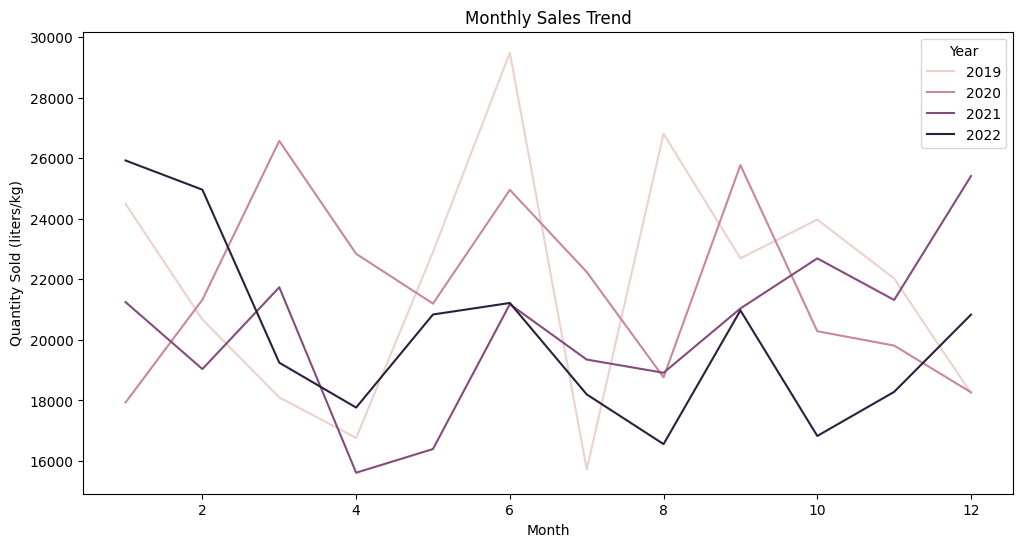

In [ ]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Year', data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Year")
plt.show()

By determining the trends of each month it is easier to determine seasonality in the market and adjust the stock and promotion strategies.

 Product Performance

In [ ]:
# Group by Product Name to get total sales for each product
product_sales = data.groupby('Product Name')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False).reset_index()

<ipython-input-53-1b52d2e5460c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




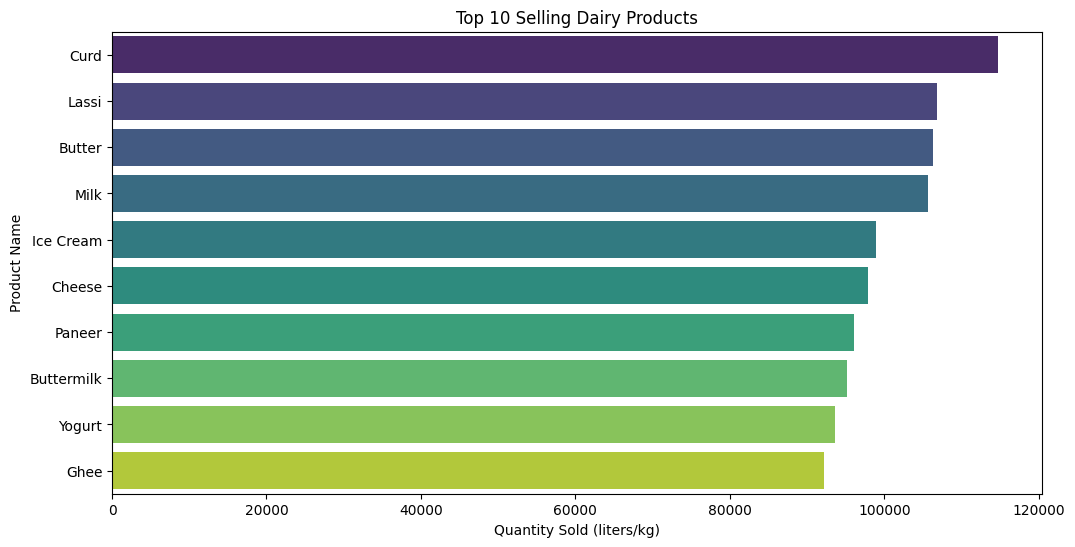

In [ ]:
# Plot Product Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Sold (liters/kg)', y='Product Name', data=product_sales.head(10), palette='viridis')
plt.title("Top 10 Selling Dairy Products")
plt.xlabel("Quantity Sold (liters/kg)")
plt.ylabel("Product Name")
plt.show()

Understanding which products sell the most can help prioritize production and promotional efforts.

Seasonal Analysis

In [ ]:
# Group by Product Category, Month to see seasonal sales patterns
seasonal_sales = data.groupby(['Product Name', 'Month'])['Quantity Sold (liters/kg)'].sum().reset_index()

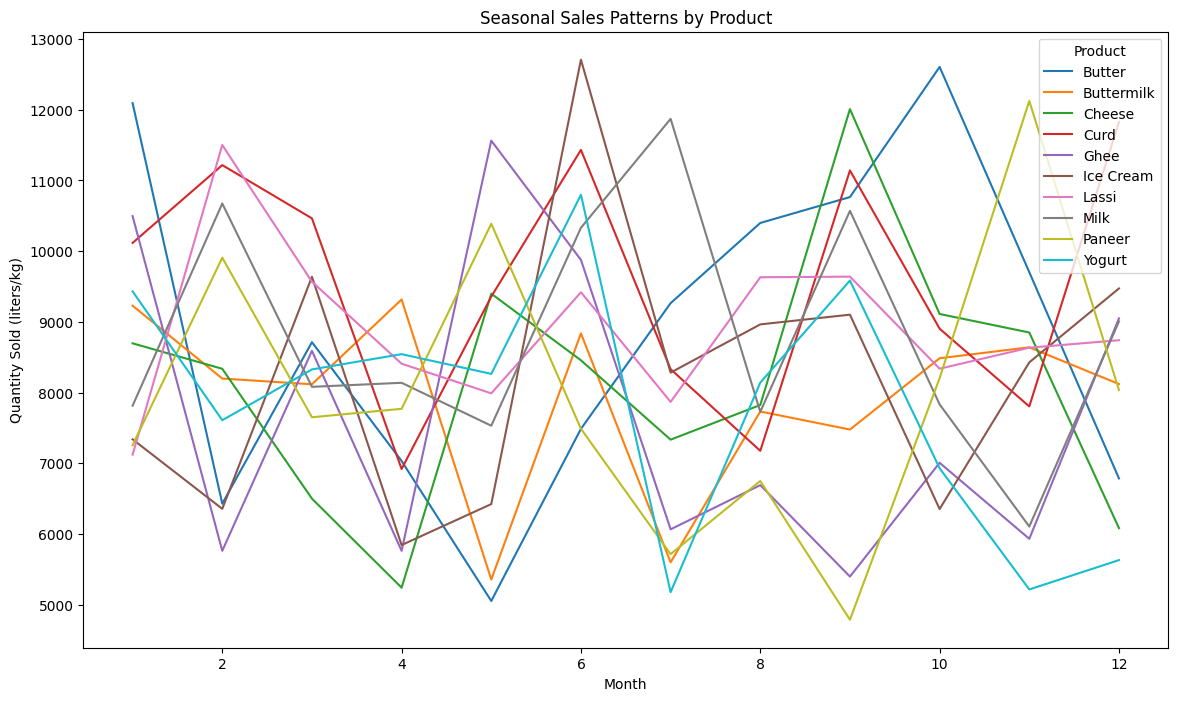

In [ ]:
# Plot Seasonal Sales Patterns
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Quantity Sold (liters/kg)', hue='Product Name', data=seasonal_sales)
plt.title("Seasonal Sales Patterns by Product")
plt.xlabel("Month")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Product")
plt.show()

Identifying seasonality can help adjust marketing strategies and stock levels to meet demand during peak seasons.


Interactive Visualization

In [ ]:
# Interactive Sales Trend Visualization by Product Name
fig = px.line(seasonal_sales, x="Month", y="Quantity Sold (liters/kg)", color="Product Name",
              title="Interactive Seasonal Sales Patterns by Product",
              labels={"Quantity Sold (liters/kg)": "Quantity Sold (liters/kg)", "Month": "Month"})
fig.show()

Interactive plots allow users to explore data more deeply, revealing insights that may not be immediately apparent in static charts.


##### Milestone 2 Code for Interactive Visualization Development
Analyzing Price Elasticity

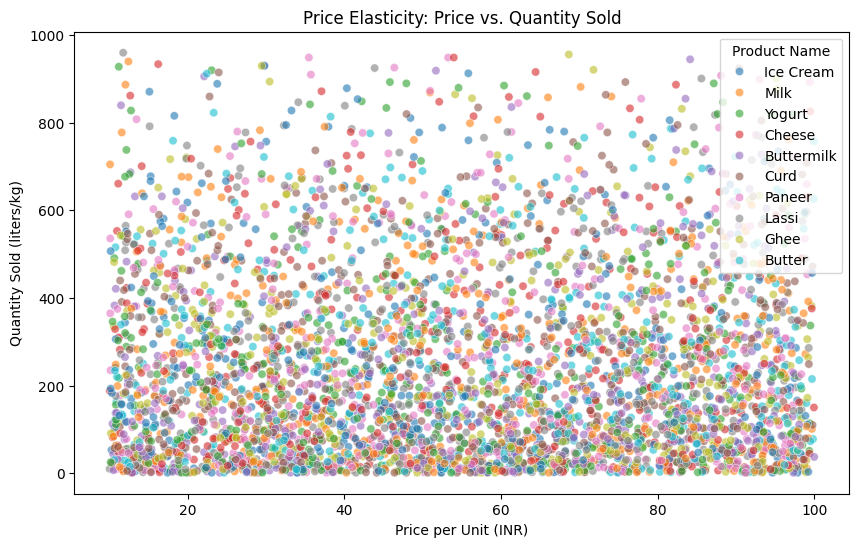

In [ ]:
# Scatter plot for Price vs. Quantity Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity Sold (liters/kg)', data=data, hue='Product Name', alpha=0.6)
plt.title("Price Elasticity: Price vs. Quantity Sold")
plt.xlabel("Price per Unit (INR)")
plt.ylabel("Quantity Sold (liters/kg)")
plt.legend(title="Product Name")
plt.show()

Understanding how changes in price affect sales volume can help optimize pricing strategies.


Regional Sales Performance

<ipython-input-34-069a55152673>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




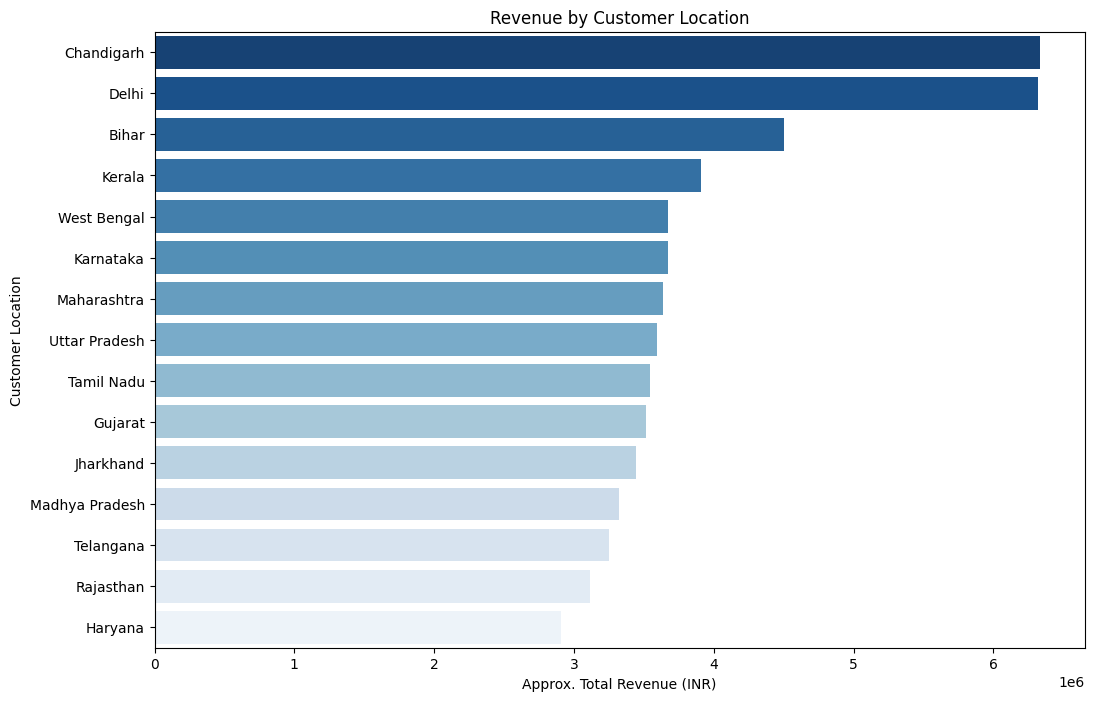

In [ ]:
# Group by Customer Location to calculate total revenue
regional_sales = data.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False).reset_index()

# Plot total revenue by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Approx. Total Revenue(INR)', y='Customer Location', data=regional_sales, palette='Blues_r')
plt.title("Revenue by Customer Location")
plt.xlabel("Approx. Total Revenue (INR)")
plt.ylabel("Customer Location")
plt.show()

Regional analysis can highlight areas with strong or weak sales, guiding targeted marketing or distribution efforts.


Stock and Reorder Analysis

<ipython-input-35-f91b4695b2c3>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




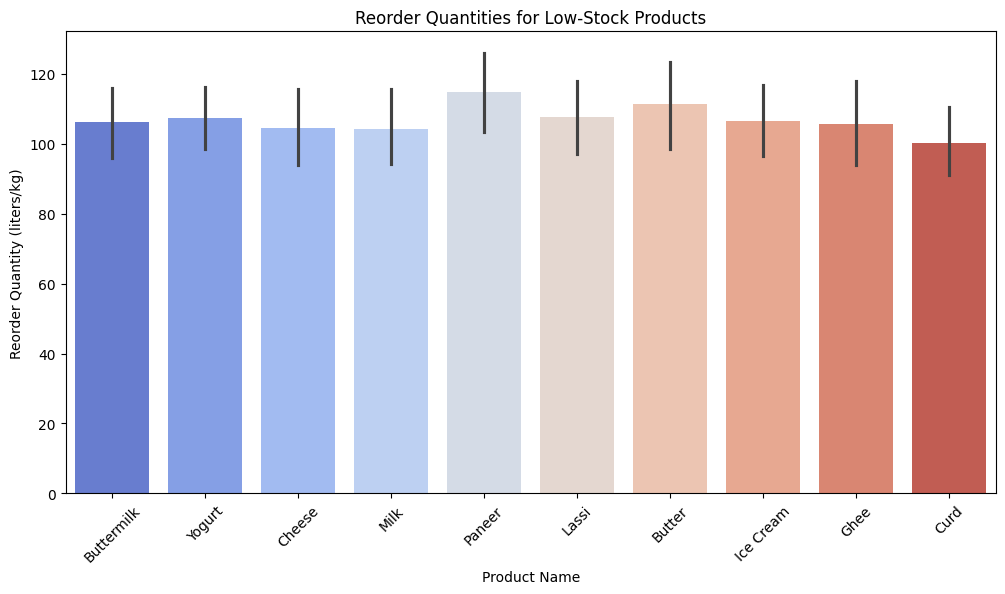

In [ ]:
# Flag products with stock below the minimum threshold
data['Low Stock'] = data['Quantity in Stock (liters/kg)'] < data['Minimum Stock Threshold (liters/kg)']

# Plot the low-stock products and reorder quantity
low_stock_data = data[data['Low Stock']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Reorder Quantity (liters/kg)', data=low_stock_data, palette='coolwarm')
plt.title("Reorder Quantities for Low-Stock Products")
plt.xlabel("Product Name")
plt.ylabel("Reorder Quantity (liters/kg)")
plt.xticks(rotation=45)
plt.show()

Monitoring stock levels helps avoid stockouts and ensures continuous product availability, which is vital for maintaining customer satisfaction.


Interactive Dashboards

In [ ]:
# Interactive Regional Sales Revenue
fig = px.bar(regional_sales, x="Approx. Total Revenue(INR)", y="Customer Location", title="Interactive Revenue by Region",
             labels={"Approx. Total Revenue(INR)": "Revenue (INR)", "Customer Location": "Region"},
             color="Approx. Total Revenue(INR)", color_continuous_scale="Viridis")
fig.show()

# Price Elasticity Interactive Scatter
fig2 = px.scatter(data, x='Price per Unit', y='Quantity Sold (liters/kg)', color='Product Name',
                  title="Price vs Quantity Sold by Product",
                  labels={"Price per Unit": "Price (INR)", "Quantity Sold (liters/kg)": "Quantity Sold"})
fig2.show()


Reasons for Content and Structure of the Interactive Regional Sales Revenue Visualization
-The idea behind using this multi-tabbed user interface is to enable the stakeholders to determine which areas generate the most revenue.
- In particular, one can adjust a chart to see the precise revenue values for each particular region with a simple mouseover, thus increasing the effectiveness of the tool.
- This can in turn help in determining the amount of resources to be allocated in the region, and the best marketing strategies to use.


In [ ]:
# Interactive Visualization: Stock Levels
fig3 = px.bar(data, x='Product Name', y='Quantity in Stock (liters/kg)', color='Low Stock',
              title="Current Stock Levels and Low Stock Status",
              labels={"Quantity in Stock (liters/kg)": "Stock Quantity", "Product Name": "Product"},
              color_discrete_map={True: "red", False: "green"})
fig3.show()

Rationale for the Stock Levels visualization
- This visualization is very helpful when it comes to tracking stock and making sure that some products are always in stock. This is critical as marking a low stock product in red ensures that the attention of the users is quickly drawn to areas of the supply chain that may require some action.
It helps in inventory management through highlighting those products that automatically indicate they have reached their minimum inventory level.
